In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('../data/onion_NO_OUTLIERS.csv')

In [2]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")
df = df.set_index("DATE")

In [3]:
df = df.resample('1D').interpolate(mehod= "linear")

In [4]:
window_size = 7
data = df.rolling(window_size).mean()

In [5]:
for i in range(window_size):
    data['MODAL'][i] = df['MODAL'][i]
df = data

In [6]:
df = df.reset_index()

<AxesSubplot:ylabel='MODAL'>

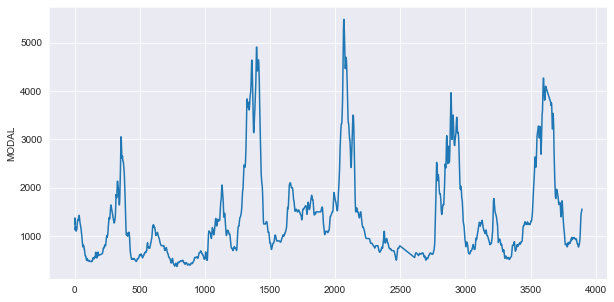

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data= df['MODAL'], ax= axes)

In [8]:
start_idx = df.index[df.DATE == '2012-01-01'][0]
end_idx = df.index[df.DATE == '2019-12-31'][0] + 1
data = df[start_idx:end_idx]
data = data.reset_index()
data

,index,DATE,MODAL
0,730,2012-01-01,540.816327
1,731,2012-01-02,536.734694
2,732,2012-01-03,530.612245
3,733,2012-01-04,522.448980
4,734,2012-01-05,512.244898
...,...,...,...
2917,3647,2019-12-27,3835.227273
2918,3648,2019-12-28,3826.704545
2919,3649,2019-12-29,3818.181818
2920,3650,2019-12-30,3809.659091


In [9]:
# df[df['DATE'] == data['DATE'][start_idx] - relativedelta(years=1)]
col = 'DATE'
one_year = []
second_year = []
for i in range(0, len(data[col])):
    diff1 = data[col][i] - relativedelta(years = 1)
    diff2 = data[col][i] - relativedelta(years = 2)
    if diff1 in df.values:
        one_year.append(df.loc[df[col] == diff1, 'MODAL'].iloc[0])
    else:
        one_year.append(None)
    if diff2 in df.values:
        second_year.append(df.loc[df[col] == diff2, 'MODAL'].iloc[0])
    else:
        second_year.append(None)

In [10]:
data = data.assign(one_year = one_year, second_year = second_year)

In [11]:
data.isnull().values.any()

False

In [12]:
df = data.drop(['index', 'DATE'], axis = 1)

In [13]:
col = df.columns
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data = x_scaled, columns = col)
df

,MODAL,one_year,second_year
0,0.033144,0.440950,0.171908
1,0.032345,0.442697,0.196366
2,0.031147,0.446191,0.174354
3,0.029550,0.439203,0.152341
4,0.027553,0.432215,0.147449
...,...,...,...
2917,0.677752,0.075472,0.489867
2918,0.676085,0.071978,0.489867
2919,0.674417,0.067086,0.493361
2920,0.672750,0.064990,0.503843


In [14]:
train_set, test_set = train_test_split(df,test_size=0.20,random_state=42)
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set['MODAL']
X_test = test_set.drop('MODAL', 1)

In [15]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 0.17713329142847617 Mean of MODAL: 0.21239761076282132
R2 score is 0.2378341941052683


In [16]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING:
Root MSE of the model: 0.16466470000674466 Mean of MODAL: 0.20340088422709515
R2 score is 0.2701439991247121


In [17]:
data

,index,DATE,MODAL,one_year,second_year
0,730,2012-01-01,540.816327,2625.000000,1250.000000
1,731,2012-01-02,536.734694,2633.928571,1375.000000
2,732,2012-01-03,530.612245,2651.785714,1262.500000
3,733,2012-01-04,522.448980,2616.071429,1150.000000
4,734,2012-01-05,512.244898,2580.357143,1125.000000
...,...,...,...,...,...
2917,3647,2019-12-27,3835.227273,757.142857,2875.000000
2918,3648,2019-12-28,3826.704545,739.285714,2875.000000
2919,3649,2019-12-29,3818.181818,714.285714,2892.857143
2920,3650,2019-12-30,3809.659091,703.571429,2946.428571


In [18]:
df = data.drop(['index'], axis = 1)

In [19]:
end_index = df.index[df.DATE == '2017-12-31'][0] + 1
train_set = df[0:end_index]
train_set = train_set.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2018-01-01'][0]
index2 = df.index[df.DATE == '2018-12-31'][0] + 1
test_set1 = df[index1:index2]
test_set1 = test_set1.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2019-01-01'][0]
index2 = df.index[df.DATE == '2019-12-31'][0] + 1
test_set2 = df[index1:index2]
test_set2 = test_set2.drop(['DATE'], axis = 1)

In [20]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set1['MODAL']
X_test = test_set1.drop('MODAL', 1)

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 932.2044450832302 Mean of MODAL: 1420.935121220021
R2 score is 0.1651749490461687


In [22]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2018 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2018 data:
Root MSE of the model: 606.7299976598953 Mean of MODAL: 1268.0821917808228
R2 score is 0.18698204520571426


In [23]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set2['MODAL']
X_test = test_set2.drop('MODAL', 1)

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 932.2044450832302 Mean of MODAL: 1420.935121220021
R2 score is 0.1651749490461687


In [25]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2019 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2019 data:
Root MSE of the model: 956.0785007207453 Mean of MODAL: 1788.2674346201754
R2 score is 0.42359810238778406


<AxesSubplot:>

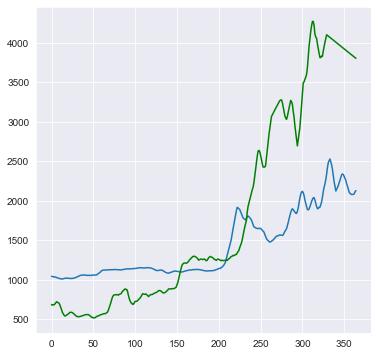

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(6,6))
sns.lineplot(data= lin_Y_test_predict.tolist(), ax= axes)
sns.lineplot(data= Y_test.tolist(), ax= axes, color = 'green')